---


<center><h1 class="list-group-item list-group-item-success">Cataract Prediction</center>

---

# Description
Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into two labels:

<li>Normal (N)</li><br>
<li>Cataract (C)</li><br>
<li> Glaucoma (G)</li><br>
<li> macular degeneration (M)</li>


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
dataset_link="https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k"
od. download (dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dianagonzalezalfaro
Your Kaggle Key: ··········


100%|██████████| 1.62G/1.62G [00:19<00:00, 91.6MB/s]


In [ ]:
os.chdir('ocular-disease-recognition-odir5k')
os.listdir()

['full_df.csv', 'preprocessed_images', 'ODIR-5K']

In [ ]:
df = pd.read_csv("full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


> <h3> Extracting Cataract & Normal information from the Dataset </h3>

In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
def has_glaucoma(text):
    if "glaucoma" in text:
        return 1
    else:
        return 0

In [ ]:
def has_macular(text):
    if "macular degeneration" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
df["left_glaucoma"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))
df["right_glaucoma"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))

In [ ]:
df["left_macular"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_macular(x))
df["right_macular"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_macular(x))

In [ ]:
df["right_cataract"][1:5]

1    0
2    0
3    0
4    0
Name: right_cataract, dtype: int64

In [ ]:
df["right_glaucoma"][1:5]

1    0
2    0
3    0
4    0
Name: right_glaucoma, dtype: int64

In [ ]:
df["right_macular"][1:5]

1    0
2    0
3    0
4    0
Name: right_macular, dtype: int64

In [ ]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values

In [ ]:
left_glaucoma = df.loc[(df.G ==1) & (df.left_glaucoma == 1)]["Left-Fundus"].values

In [ ]:
left_macular = df.loc[(df.M ==1) & (df.left_macular == 1)]["Left-Fundus"].values

In [ ]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [ ]:
right_glaucoma = df.loc[(df.G ==1) & (df.right_glaucoma == 1)]["Right-Fundus"].values
right_glaucoma[:15]

array(['43_right.jpg', '167_right.jpg', '238_right.jpg', '247_right.jpg',
       '365_right.jpg', '583_right.jpg', '746_right.jpg', '931_right.jpg',
       '1209_right.jpg', '1210_right.jpg', '1211_right.jpg',
       '1212_right.jpg', '1213_right.jpg', '1214_right.jpg',
       '1215_right.jpg'], dtype=object)

In [ ]:
right_macular = df.loc[(df.M ==1) & (df.right_macular == 1)]["Right-Fundus"].values
right_macular[:15]

array(['938_right.jpg', '938_right.jpg'], dtype=object)

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [ ]:
print("Number of images in left glaucoma: {}".format(len(left_glaucoma)))
print("Number of images in right glaucoma: {}".format(len(right_glaucoma)))

Number of images in left glaucoma: 332
Number of images in right glaucoma: 284


In [ ]:
print("Number of images in left macular degeneration: {}".format(len(left_macular)))
print("Number of images in right macular degeneration: {}".format(len(right_macular)))

Number of images in left macular degeneration: 4
Number of images in right macular degeneration: 2


>Normal Images

In [ ]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [ ]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)
glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis=0)
macular = np.concatenate((left_macular,right_macular),axis=0)

In [ ]:
print(len(cataract),len(normal), len(glaucoma), len(macular))

594 500 616 6


><h3>Creating Dataset from images</h3>

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))

        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset


In [ ]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [00:03<00:00, 174.22it/s]


In [ ]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [00:04<00:00, 111.11it/s]


In [ ]:
dataset = create_dataset(glaucoma,2)

100%|██████████| 616/616 [00:08<00:00, 69.21it/s]


In [ ]:
dataset = create_dataset(macular,3)

100%|██████████| 6/6 [00:00<00:00, 59.72it/s]


In [ ]:
len(dataset)

1707

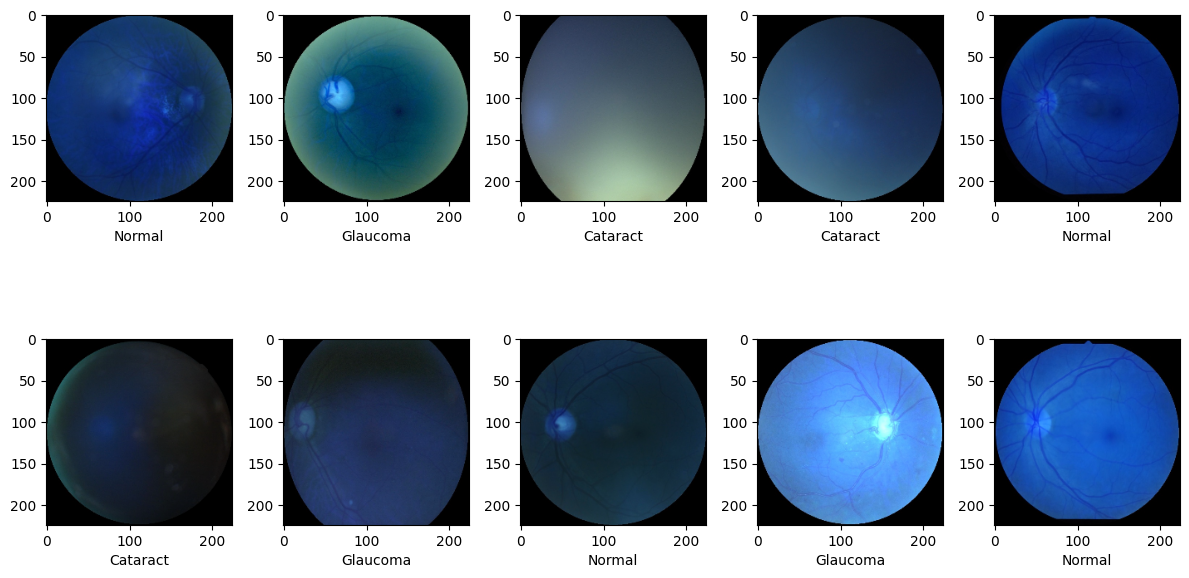

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    elif category == 1:
        label = "Cataract"
    elif category == 2:
        label = "Glaucoma"
    else:
        label = "Macular degeneration"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

><h3>Dividing dataset into x(features) & y(target)</h3>

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:
x.shape

(1707, 224, 224, 3)

In [ ]:
x[1][223][223][0]

0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Creating Model

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
history = model.fit(x_train,y_train,batch_size=32,epochs=1,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

43/43 [==============================] - ETA: 0s - loss: -27.9224 - accuracy: 0.3546 

43/43 [==============================] - 1142s 27s/step - loss: -27.9224 - accuracy: 0.3546 - val_loss: -53.7013 - val_accuracy: 0.3099


# Accuracy Metrics

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

11/11 [==============================] - 210s 19s/step - loss: -53.7013 - accuracy: 0.3099
loss: -53.70126724243164
Accuracy: 0.30994153022766113


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Obtener las probabilidades de clase
y_pred_prob = model.predict(x_test)

# Tomar la clase con la probabilidad más alta
y_pred = y_pred_prob.argmax(axis=-1)

# Ahora puedes calcular la matriz de confusión, el informe de clasificación y la precisión
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Imprime los resultados
print("Matriz de Confusión:\n", confusion)
print("Informe de Clasificación:\n", report)
print("Precisión:", accuracy)


In [ ]:
accuracy_score(y_test,y_pred)

0.30701754385964913

In [ ]:
print(classification_report(y_test,y_pred))

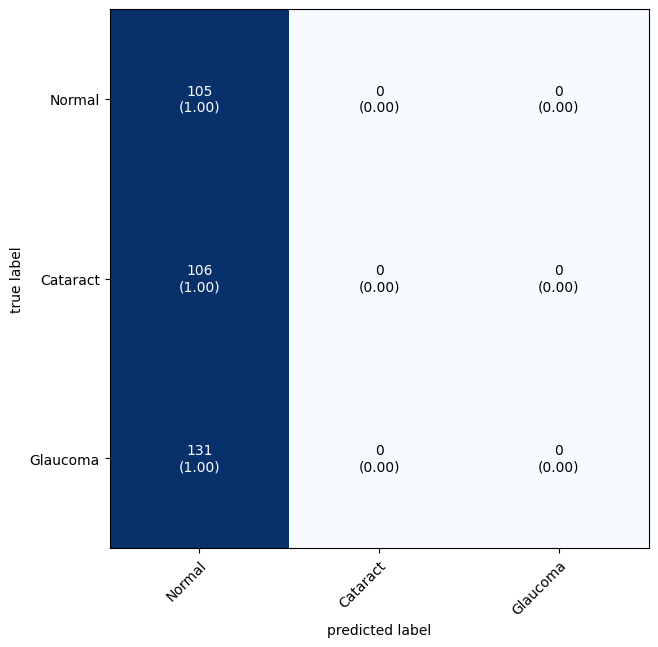

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract","Glaucoma"],
                      show_normed = True);

><h3>Prediction:</h3>

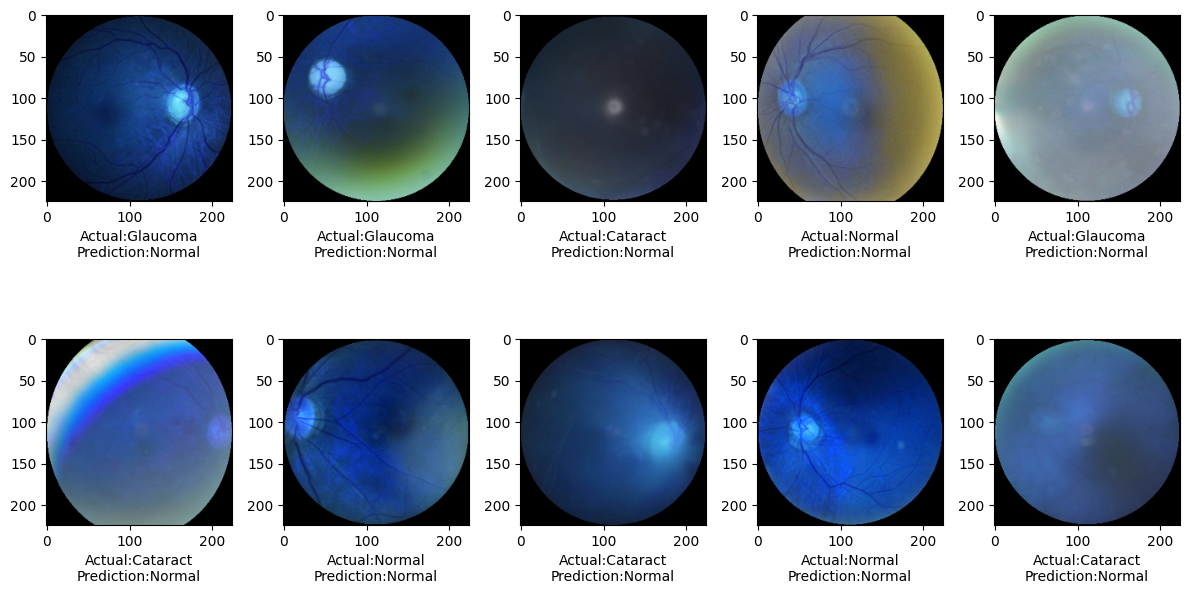

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]

    if category== 0:
        label = "Normal"
    elif category== 1:
        label = "Cataract"
    elif category == 2:
        label = "Glaucoma"
    else:
        label = "macular degeneration"

    if pred_category== 0:
        pred_label = "Normal"
    elif category== 1:
        label = "Cataract"
    elif category == 2:
        label = "Glaucoma"
    else:
        label = "macular degeneration"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

In [ ]:
model.save("my_model")


In [ ]:
model.save('models/medical_trial_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'model_final.hdf5')

<ipython-input-55-68787973cab7>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'model_final.hdf5')


In [ ]:
# Importar las bibliotecas necesarias
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

# Cargar el modelo entrenado
model = load_model("model_final.hdf5")  # Utiliza la ruta donde guardaste tu modelo

# Función para preprocesar una imagen para la predicción
def preprocesar_imagen(ruta_img):
    img = image.load_img(ruta_img, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Función para hacer una predicción
def predecir_imagen(ruta_img):
    img_array = preprocesar_imagen(ruta_img)
    prediccion = model.predict(img_array)
    return prediccion

# Ejemplo de uso para la primera imagen:
ruta_primera_imagen = 'ODIR-5K/ODIR-5K/Training Images/153_left.jpg'
prediccion_primera_imagen = predecir_imagen(ruta_primera_imagen)

# Interpretar la predicción para la primera imagen
if prediccion_primera_imagen[0][0] > 0.5:
    print("Predicción para la primera imagen: Catarata")
elif prediccion_primera_imagen[0][1] > 0.5:
    print("Predicción para la segunda imagen: Glaucoma")
elif prediccion_primera_imagen[0][2] > 0.5:
    print("Predicción para la segunda imagen: macular degeneration")
else:
    print("Predicción para la primera imagen: Normal")

# Ejemplo de uso para la segunda imagen:
ruta_segunda_imagen = 'ODIR-5K/ODIR-5K/Training Images/153_right.jpg'  # Reemplaza con la ruta real de la segunda imagen
prediccion_segunda_imagen = predecir_imagen(ruta_segunda_imagen)

# Interpretar la predicción para la segunda imagen
if prediccion_primera_imagen[0][0] > 0.5:
    print("Predicción para la primera imagen: Catarata")
elif prediccion_primera_imagen[0][1] > 0.5:
    print("Predicción para la segunda imagen: Glaucoma")
elif prediccion_primera_imagen[0][2] > 0.5:
    print("Predicción para la segunda imagen: macular degeneration")
else:
    print("Predicción para la primera imagen: Normal")


1/1 [==============================] - 1s 741ms/step
Predicción para la primera imagen: Catarata
1/1 [==============================] - 1s 1s/step
Predicción para la primera imagen: Catarata
